### Project Milestone 5

## Has the number of people with email accounts increased or decreased as computer sales increased over time?

Cleaned data has been loaded into three different databases. First I will combine the three into one database with three tables.

In [ ]:
#During each project milestone I added the cleansed data to the database. Here's the code

# Connect to the database
conn = sqlite3.connect('Projectdata.db')

# Write the DataFrame to a SQLite3 table
FREDcellData.to_sql(name='purchases', con=conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [ ]:
import sqlite3
# Connect to the database
conn = sqlite3.connect('Projectdata.db')

# Write the DataFrame to a SQLite3 table
df2.to_sql(name='emailcount', con=conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [ ]:
import sqlite3
# Connect to the database
conn = sqlite3.connect('Projectdata.db')

# Write the DataFrame to a SQLite3 table
strippedData.to_sql(name='worlddata', con=conn, if_exists='replace', index=False)

# Close the connection
conn.close()

### For this presentation we will review the number of computer sales, cell phones, and email accounts in use over time. First we'll call the information from the database and take a look at some visualizations.

### World Data of Cell Phone Users

In [8]:
# Checking merged database contents, by calling the three tables. 

import sqlite3

conn = sqlite3.connect('Projectdata.db')
cursor = conn.cursor()

cursor.execute('SELECT * FROM worlddata')
WorldCellData = cursor.fetchall()
print(WorldCellData)

cursor.close()
conn.close()

[('World', '7,950,000,000+', 7621018958), ('China', '1610360000', 1420050000), ('India', '1515971713', 1375245994), ('Indonesia', '385573398', 237556363), ('United States', '380577528', 327874628), ('Brazil', '284200000', 201032714), ('Russia', '256116000', 142905200), ('Pakistan', '194580369', 219922083), ('Nigeria', '190475494', 190551754), ('Bangladesh', '180780000', 162951560), ('Japan', '146649600', 127300000), ('Germany', '107000000', 81882342), ('Philippines', '106987098', 94013200), ('Mexico', '101339000', 112322757), ('Iran', '96165000', 86330703), ('Egypt', '95340000', 99958000), ('Italy', '88580000', 60790400), ('United Kingdom', '83100000', 64100000), ('Vietnam', '72300000', 90549390), ('Turkey', '72200000', 79463663), ('France', '72180000', 63573842), ('Thailand', '69000000', 67480000), ('South Africa', '59474500', 50586757), ('Colombia', '57900472', 49375617), ('Ukraine', '57505555', 45579904), ('Argentina', '56725200', 40134425), ('Tanzania', '56313438', 48715877), ('Sou

In [24]:
# Updating column headings and converting to data frame for visualizations


conn = sqlite3.connect('Projectdata.db')

# Execute a SQL query to retrieve the data as a list
cursor = conn.cursor()
cursor.execute('SELECT * FROM worlddata')
data = cursor.fetchall()

# Convert the list to a pandas DataFrame
worlddataframe = pd.DataFrame(data, columns=['Location', 'CellPhones', 'Population'])

# Close the cursor and the connection to the database
cursor.close()
conn.close()

In [36]:
worlddataframe

,Location,CellPhones,Population
0,World,NaN,7621018958
1,China,1.610360e+09,1420050000
2,India,1.515972e+09,1375245994
3,Indonesia,3.855734e+08,237556363
4,United States,3.805775e+08,327874628
...,...,...,...
72,Estonia,1.904000e+06,1269420
73,Cuba,1.300000e+06,11200000
74,Montenegro,1.117500e+06,620029
75,Malta,5.546510e+05,452515


In [35]:
## Converting dataframe from database to numeric values for visualizations

worlddataframe['CellPhones'] = pd.to_numeric(worlddataframe['CellPhones'], errors='coerce')
worlddataframe['Population'] = pd.to_numeric(worlddataframe['Population'], errors='coerce')

### The 'Cell Phones by Population' gives us some perspective on the sheer volumn of the number of cell phones bought from 2017 to 2021. For the rest of the visualizations we will focus on the united states alone, but I wanted to provide some additional world view context. 

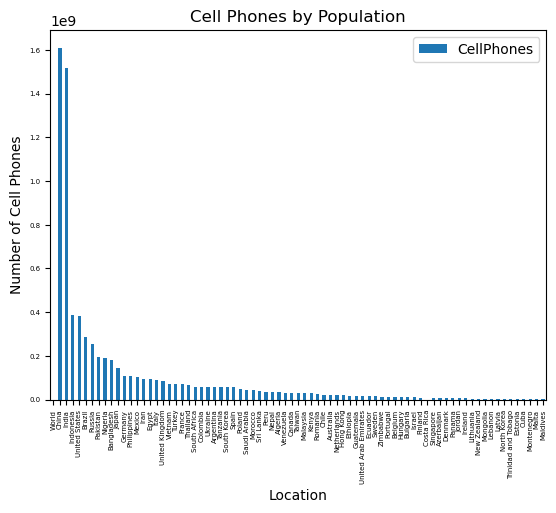

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# assuming your data is in a pandas DataFrame called 'df'
worlddataframe.plot(kind='bar', x='Location', y='CellPhones')

plt.title('Cell Phones by Population')
plt.xlabel('Location')
plt.ylabel('Number of Cell Phones')
plt.tick_params(axis='both', labelsize=5)
plt.show()

### Number Email Users

In [48]:
conn = sqlite3.connect('Projectdata.db')
cursor = conn.cursor()

cursor.execute('SELECT * FROM emailcount')
CountEmailAccounts = cursor.fetchall()
print(CountEmailAccounts)

cursor.close()
conn.close()

[('\ufeff2017', '3718%'), ('2018', '3823%'), ('2019', '3930%'), ('2020', '4037%'), ('2021', '4147%'), ('2022', '4258%'), ('2023', '4371%'), ('2024', '4481%'), (None, None), (None, None)]


In [54]:
# Updating column headings and converting to data frame for visualizations


conn = sqlite3.connect('Projectdata.db')

# Execute a SQL query to retrieve the data as a list
cursor = conn.cursor()
cursor.execute('SELECT * FROM emailcount')
data = cursor.fetchall()

# Convert the list to a pandas DataFrame
EmailAccounts = pd.DataFrame(data, columns=['Year', 'EmailAccounts'])

# Close the cursor and the connection to the database
cursor.close()
conn.close()

In [85]:
EmailAccounts

,Year,EmailAccounts
1,2018.0,3823.0
2,2019.0,3930.0
3,2020.0,4037.0
4,2021.0,4147.0
5,2022.0,4258.0
6,2023.0,4371.0
7,2024.0,4481.0


#### In the visual below we see that the number of email accounts created 'in millions' is in steady contrast to the year.

In [108]:
import plotly.express as px
import pandas as pd

# assuming your data is in a pandas DataFrame called 'df'
fig = px.imshow(EmailAccounts.corr(), x=EmailAccounts.columns, y=EmailAccounts.columns)

fig.update_layout(title='Number of Email Acocunts Created in Millions')

fig.show()

### Computer Purchases

In [10]:
conn = sqlite3.connect('Projectdata.db')
cursor = conn.cursor()

cursor.execute('SELECT * FROM purchases')
ComputerSales = cursor.fetchall()
print(ComputerSales)

cursor.close()
conn.close()

[('1960-01-01', '0'), ('1961-01-01', '.'), ('1962-01-01', '.'), ('1963-01-01', '.'), ('1964-01-01', '.'), ('1965-01-01', '0'), ('1966-01-01', '.'), ('1967-01-01', '.'), ('1968-01-01', '.'), ('1969-01-01', '.'), ('1970-01-01', '0'), ('1971-01-01', '.'), ('1972-01-01', '.'), ('1973-01-01', '.'), ('1974-01-01', '.'), ('1975-01-01', '0'), ('1976-01-01', '0'), ('1977-01-01', '0'), ('1978-01-01', '0'), ('1979-01-01', '0'), ('1980-01-01', '0'), ('1981-01-01', '.'), ('1982-01-01', '.'), ('1983-01-01', '.'), ('1984-01-01', '0.039352779'), ('1985-01-01', '0.14468149'), ('1986-01-01', '0.28706876'), ('1987-01-01', '0.513170208'), ('1988-01-01', '0.854125086'), ('1989-01-01', '1.432490449'), ('1990-01-01', '2.129545117'), ('1991-01-01', '3.004111275'), ('1992-01-01', '4.323596882'), ('1993-01-01', '6.186519908'), ('1994-01-01', '9.202002036'), ('1995-01-01', '12.71760532'), ('1996-01-01', '16.37381226'), ('1997-01-01', '20.30588082'), ('1998-01-01', '25.09083926'), ('1999-01-01', '30.82116044'), (

In [70]:
conn = sqlite3.connect('Projectdata.db')

# Execute a SQL query to retrieve the data as a list
cursor = conn.cursor()
cursor.execute('SELECT * FROM purchases')
data = cursor.fetchall()

# Convert the list to a pandas DataFrame
ComputerPurchases = pd.DataFrame(data, columns=['Year', 'ComputerPurchases'])

# Close the cursor and the connection to the database
cursor.close()
conn.close()

In [96]:
ComputerPurchases.head(50)

,Year,ComputerPurchases
57,2017,103.129789
58,2018,104.847944
59,2019,106.414019
60,2020,104.935375
61,2021,107.305504


### What we see in the computer purchase visual below is a constant increase in computer purchases trending upwards that likens to the number of email accounts and cell phone purchases over time.

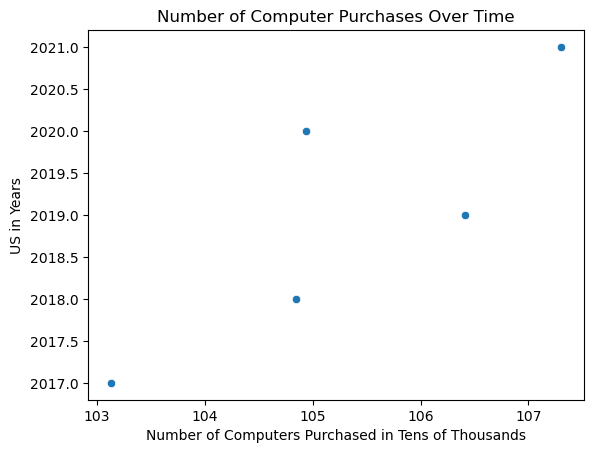

In [98]:
import seaborn as sns
import pandas as pd

sns.scatterplot(data=ComputerPurchases, x='ComputerPurchases', y='Year')

plt.title('Number of Computer Purchases Over Time')
plt.xlabel('Number of Computers Purchased in Tens of Thousands')
plt.ylabel('US in Years')
plt.show()

### I just want to take a moment to visualize the rate of computer purchases and email accounts created over time for some additional context. 
#### What we see below is the popularity of having an email account did not pick up until the 2010s. This is telling and correlates that the number of email acocunts increased as computer sales increased.

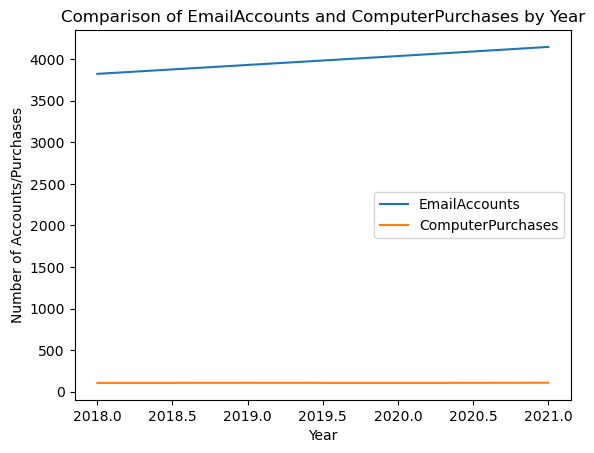

In [103]:
plt.plot(merged_data['Year'], merged_data['EmailAccounts'], label='EmailAccounts')
plt.plot(merged_data['Year'], merged_data['ComputerPurchases'], label='ComputerPurchases')

# Add chart title and labels
plt.title('Comparison of EmailAccounts and ComputerPurchases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accounts/Purchases')

# Add legend
plt.legend()

# Show chart
plt.show()

In [100]:
merged_data = pd.merge(EmailAccounts, ComputerPurchases, on='Year')

In [101]:
merged_data

,Year,EmailAccounts,ComputerPurchases
0,2018.0,3823.0,104.847944
1,2019.0,3930.0,106.414019
2,2020.0,4037.0,104.935375
3,2021.0,4147.0,107.305504


### For our final visualization let's take a look at the number of email accounts and computer purchases for the last 6 years. 

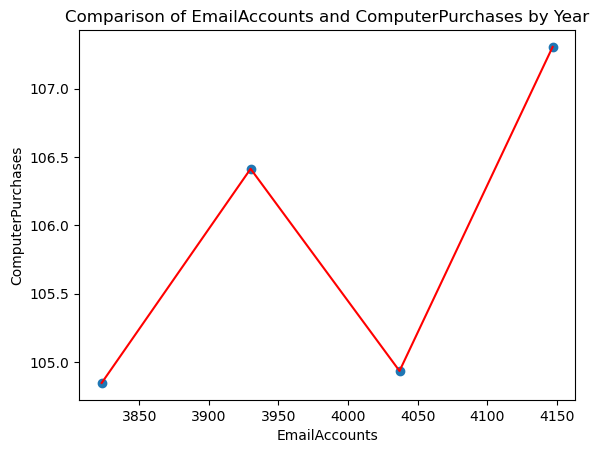

In [107]:
# Create scatter plot
plt.scatter(merged_data['EmailAccounts'], merged_data['ComputerPurchases'])
plt.plot(merged_data['EmailAccounts'], merged_data['ComputerPurchases'], color='red')

# Add chart title and labels
plt.title('Comparison of EmailAccounts and ComputerPurchases by Year')
plt.xlabel('EmailAccounts')
plt.ylabel('ComputerPurchases')

# Show chart
plt.show()

### Conclusion
When computer sales are high, the number of email accounts created trends up. 

I learned a ton during this project and had an equal amount of fun. I needed to master sqlite3 and database creation so that I can effectively manage and store massive datasets. SQLite3's database creation, modification, and querying features make it easy to store, retrieve, and organize information. Knowledge of database and table design is also important for ensuring that information is stored and organized sensibly in relation to the issue I'm addressing. The ability to manage and secure data is invaluable when building data-driven applications, which is where my expertise shines. 

To complete this project, I had to venture out into SQL. A language that I use at work in limited scope and with visual editors, but this project gave me more confidence in building a database and making more advance queries. Ethical data cleaning and EDA brought to light the responsibility we have as data sciencetist not to obscure or skew data. Completing the EDA process with an unbiased approach was tough, as we all have our 'lens' when manipulating data.    

Second, the ability to make visual representations of data is critical in data science because it facilitates my communication of nuanced insights to a wide range of audiences in a straightforward manner. Data visualizations have helped me see trends and patterns in my data that I would not have noticed otherwise. Furthermore, I can generate numerous types of visualizations, including bar charts, histograms, scatter plots, and heatmaps, with the help of visualization tools like matplotlib and seaborn. The ability to explore data, spot trends, and predict outcomes is crucial for making decisions based on facts, and these tools make that possible. Having mastered these abilities, I will be an asset to any data-driven organization in which I am placed due to my ability to effectively convey insights and findings to stakeholders. 